In [1]:
import tensorflow as tf
%load_ext tensorboard
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import seaborn as sns
from scipy import stats 
from scipy import linalg

In [2]:
print(tf.__version__)

1.15.0


---- 
**Detecting Spikes**



--------

**Saving Variables in Tensorflow**

In [3]:
sess = tf.InteractiveSession()


#Create a boolean variable called 'spike' to detect a sudden increase in a series of numbers.
#since all variables must be initialized, initialize the variable by calling 'run' on its 'initializer':

vector = [3., -2., 8, -4., 0.2, 2.3, 7.5, 14.8]
spikes = tf.Variable([False] * len(vector), name='spikes')

#sess.run(spike.initializer)
spikes.initializer.run()

# The saver op will enable saving and restoring
saver = tf.train.Saver()

# Loop through the data and update the spike variable when there is a significant increase
for i in range(1, len(vector)):
    if vector[i] - vector[i - 1] >5:
        spikes_val = spikes.eval()
        spikes_val[i] = True
        updater = tf.assign(spikes, spikes_val)
        updater.eval()

save_path = saver.save(sess, "./spikes/spikes.ckpt")
print("spikes data saved in file %s" % save_path)

sess.close()

spikes data saved in file ./spikes/spikes.ckpt


**Loading Variables in Tensorflow** 

In [4]:
#sess = tf.InteractiveSession()

#spikes = tf.Variable([False] *8, name = 'spikes')

#saver = tf.train.Saver()

#saver.restore(sess, "./spikes.ckpt")
#print(spikes.eval())
#sess.close()

-----
**More on constructing the actual graph using Tensorboard**

In [5]:

# Let's define our input nodes:
a = tf.constant(5, name="input_a")
b = tf.constant(3, name ="input_b")

#Defining the next two nodes in our graph:
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name = "add_d")

# this last line defines the final node in our graph
e = tf.add(c,d, name = 'add_e')


In [6]:
# To create the graph:
sess = tf.Session()
file_writer = tf.summary.FileWriter('./graphs', sess.graph)

# We clean up before we exit()
file_writer.close()
sess.close()


In [7]:
tensorboard --logdir="./graphs" --port=8008

Reusing TensorBoard on port 8008 (pid 1457), started 1:24:48 ago. (Use '!kill 1457' to kill it.)

----

**TensorFlow Operations**



In [8]:
# initialize some tensors to use in computation
a = np.array([2,3], dtype = np.int32)
b = np.array([4,5], dtype = np.int32)

type(a)


numpy.ndarray

In [9]:
# Use 'tf.add()' to initialize an "add" Operation
# The variable 'c' will be handle to the Tensor output of this op
sess = tf.InteractiveSession()
c = tf.add(a,b)

print(type(c))
print(c.eval())

sess.close()

<class 'tensorflow.python.framework.ops.Tensor'>
[6 8]


**Overloarded operators**

- Tensorflow also overloads common mathematical operators to make multiplication, addition, subtraction and other operations more conise
- if one or more arguments to the operator is a tensorflow object, a tensorflow operation will be called and added to the graph
    - for example, you can easily add two tensors together like this
    
 

In [10]:
sess = tf.InteractiveSession()
a = tf.constant([2,3])
b = tf.constant([4,5])
c = a + b

print(type(c))
print(c.eval())

sess.close()

<class 'tensorflow.python.framework.ops.Tensor'>
[6 8]


-----

**Creating Aliases**
- Tensorflow allows us to create aliases for all common mathematical operators such as negation, subtract, multiplication, or other operations to be more concise 
    - for example, you can easily create aliases like this:

In [11]:
tf.neg = tf.negative #returns the negative value of each element in x 
tf.sub = tf.subtract # subtract y from x, element-wise 
tf.mul = tf.multiply # # multiply x and y, element-wise 


**overloarded operators and  logicals**


        tf.add()
        tf.div()
        tf.mod()
        tf.pow()
        tf.less()
        tf.less_equal()
        tf.greater()
        tf.logical_and()
        tf.logical_or()

**To check for equality or inequality try**

        tf.equal() and tf.not_equal
        but don't use ==

---

**TensorFlow graphs**
- Creating a Graph is simple:
    - its constructor doesn't take any variables
    - once we have our graph initialized, we can add Operations to it:

In [12]:
# Create new graph
g = tf.Graph()

with g.as_default():
    # Create operations as usual; they will be added to graph 'g'
    a = tf.mul(2,3)
    

- TensorFlow automatically creates a Graph when the library is loaded and assigns it to be the default
    - Thus, any operations, tensors, etc. defined outside of a 'Graph.as_default()' context manager will automatically be placed in the default graph:
    

In [13]:
# Placed in the default grap
in_default_graph = tf.add(1,2)

#Placed in graph 'g'
with g.as_default():
    in_graph_g = tf.mul(2,3)

# We are no longer in the 'with' block, so this is placed in the default graph
also_in_default_graph = tf.sub(5,1)

- if you'd like to get a handle to the default graph, use this
  

In [14]:
default_graph = tf.get_default_graph()

  - when defining multiple graphs in one file, it's better to either not use the default graph or immediately assign a handle to it 
    - this ensures that nodes are added to each graph in a uniform manner
    
 **Correct - Create new graphs, ignore default graph**

In [15]:
g1 = tf.Graph()
g2 = tf.Graph()

with g1.as_default():
    ...
    
with g2.as_default():
    ...

 **Correct - Get handle to default graph**

In [16]:
g1 = tf.get_default_graph()
g2 = tf.Graph()

with g1.as_default():
    ...
    
with g2.as_default():
    ...

**Incorrect - Mixed default graph and user-created graph styles:**

In [17]:
g2 = tf.Graph()

with g2.as_default():
    ...

- Additionally, it is possible to load in previously defined modesl from other TensorFlow scripts and assign them to Graph objects

            graph.as_graph_def()
            tf.import_graph_def
- thus, a user can compute and use the output of several separate models in the same Python file.

----
**Fetching a list in Session**

In [18]:
# Create Operations, Tensors, etc (using the default graph)
a = tf.add(2,5)
b = tf.mul(a,3)

#Start up a 'Session' using the default graph
sess = tf.Session()
sess.run([a,b])


[7, 21]

In [19]:
sess.close()



        tf.global_variables_initializer()
- prepares all tensorflow variable objects to be used 

In [20]:
#sess.run(tf.initialize_all_variables())

**feed dict**

In [21]:
# Create Operations, Tensors, etc (using the default graph)
a = tf.add(2,5)
b = tf.mul(a,3)

#Start up a 'Session' using the default graph
sess = tf.Session()

replace_dict = {a: 15}

sess.run(b, feed_dict= replace_dict)

45

In [22]:
sess.close()


-------

**Class Exercise**

- Create and plot a normally distributed cluster of random numbers, say [2,20]
- create and plot two clusters using poison distribution, say [6,20], [2,20] in red 
- comment on your result

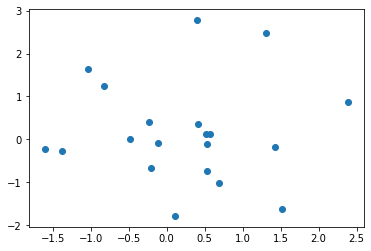

In [23]:
a = tf.random_normal([2,20])
sess = tf.Session()
out = sess.run(a)

x,y = out
plt.scatter(x,y)


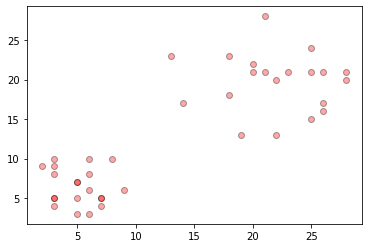

In [24]:
b = tf.random_poisson([6,20],[2,20])
sess = tf.Session()
out = sess.run(b)

x,y = out
plt.scatter(x,y, alpha = 0.35,  edgecolors = 'black', color = 'red')

----
**Tensorflow Placeholder**

- adding inputs with placeholder nodes
    - 'tf.placeholder' takes in a required parameter dtype, as well as the optional parameter shape 
            
            dtype: species the data type of values that will be passed into the placeholder. 
                This is required, in order to ensure that there will be no type mismatch errors
            shape: specifies what shape the fed Tensor will be. The default value of shape is None, 
                which means a Tensor of any shape will be accepted.

In [25]:
np.array([5,3]).shape

(2,)

In [26]:
a = tf.placeholder(tf.int32, shape =[2], name ="my_input")
b = tf.reduce_prod(a, name = "prod_b")
c = tf.reduce_sum(a, name ="sum_c")
d = tf.add(b,c, name="add_d")
sess = tf.Session()

input_dict = {a: np.array([5,3], dtype = np.int32)}

sess.run(d, feed_dict=input_dict)
writer = tf.summary.FileWriter('./hw_2', sess.graph)

#Closer our FileWriter and Session objects
writer.close()
sess.close()

In [27]:
tensorboard --logdir="./hw_2/" 

Reusing TensorBoard on port 6010 (pid 1627), started 0:22:57 ago. (Use '!kill 1627' to kill it.)

-----
**TensorFlow Variables**

- Tensor and Objects are immutable
- We need a way to save changing values over time
- This is accomplished in TensorFlow with Variable objects
- You can create a Variable by using its constructor 
        
        tf.Variable()

In [28]:
# Pass in a starting value of three for the variable
my_var = tf.Variable(3, name = "my_variable")

its present value will be passed on to the Operation using it:


In [29]:
add = tf.add(5, my_var)
mul = tf.mul(8, my_var)

**Helpher ops**

        tf.zeros()
        tf.ones()
        tf.random_normal()
        tf.random_uniform()

In [30]:
# 3x3x3 Tensor pf normally distributed numbers; mean 0 and sd 2
normal = tf.random_normal([3,3,3], mean = 0.0, stddev = 2.0)
# or 
trunc = tf.truncated_normal([3,3,3], mean = 0.0, stddev = 2.0)

can pass in these operations as the initial values of variables

In [31]:
random_var = tf.Variable(trunc)

**Initializing Variables**

- Variable objects live in the graph like most other tensorflow objects, but their state is actually mananged by a session
    - because of this, variables have an extra step involved in order to use them:
        - you must initialize the variable within a session

In [32]:
add = tf.add(5, my_var)
mul = tf.mul(8, my_var) 

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

**Tensorflow changing variables**

- if you only like to intialize a subset of variables defined in teh graph, you can use 

        tf.variables_initializer()

In [33]:
var1 = tf.Variable(0, name="initialize_me")
var2 = tf.Variable(1, name="no_initialization")

init = tf.variables_initializer([var1], name="init_var1")
sess = tf.Session()
sess.run(init)

sess.run(var1)
#sess.run(var2) will throw an error

0

- in order to change the value of the Variable, you can use the variable.assign() method, which gives the variable the new value

Example:

In [34]:
my_var = tf.Variable(1)

my_var_times_two = my_var.assign(my_var * 2)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

sess.run(my_var_times_two)

2

In [35]:

sess.run(my_var_times_two)

4

In [36]:

sess.run(my_var_times_two)

8

For simple incrementing and decrementing of Variables
        
        Variable.assign_add()
        Variable.assign_sub()

In [37]:
sess.run(my_var.assign_add(1))

9

In [38]:
sess.run(my_var.assign_sub(1))

8

Example:

In [39]:
my_var = tf.Variable(0)
init = tf.initialize_all_variables()

sess1 = tf.Session()
sess2 = tf.Session()

sess1.run(init)
sess1.run(my_var.assign_add(5))





5

In [40]:
sess2.run(init)
sess2.run(my_var.assign_add(2))


2

In [41]:
sess1.run(my_var.assign_add(5))

10

In [42]:
sess2.run(my_var.assign_add(2))

4

to reset your variables to their starting value call 

    tf.global_variables_initializer() again
    or 
    sess.run(init) after the operations

**Tensorflow trainable variables**
- optimizer classes automatically train machine learning models
- if there are Variables in your graph that should only be changed manually and not with an Optimizer, you need to set their trainable parameter to False when creating them:

In [43]:
not_trainable = tf.Variable(0, trainable = False)